# Uploading libraries and packages

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

* Plots, tabs

In [3]:
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from IPython.display import Image
import seaborn as sns
from IPython.display import HTML, display
import tabulate

* Resampling

In [4]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

* Metrics

In [5]:
from scipy.stats import chi2_contingency, ttest_ind

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle

from decimal import Decimal
import time

* Standardization, pca anlalysis

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* Cross-Validation (Avoiding overfitting)

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

* Train and Test

In [8]:
from sklearn.model_selection import train_test_split

* Neural Network

* Decision Tree/Random forest

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# DATA PREPROCESSING

Loading data

In [10]:
dataset = pd.read_csv('..//data//cust_history_10M_tool.csv')

In [11]:
nclient, observations =dataset.shape

In [12]:
dataset.head()

,EMI_TENURE,CREDIT_HISTORY,TRANSACTION_CATEGORY,TRANSACTION_AMOUNT,ACCOUNT_TYPE,ACCOUNT_AGE,STATE,IS_URBAN,IS_STATE_BORDER,HAS_CO_APPLICANT,HAS_GUARANTOR,OWN_REAL_ESTATE,OTHER_INSTALMENT_PLAN,OWN_RESIDENCE,NUMBER_CREDITS,RFM_SCORE,OWN_CAR,SHIP_INTERNATIONAL,IS_DEFAULT
0,77,EXISTING CREDITS PAID BACK,EDUCATION,27630,UNKNOWN/NONE,above 7 YRS,CT,NO,YES,YES,YES,NO,YES,NO,0,4,NO,NO,No
1,119,EXISTING CREDITS PAID BACK,ELECTRONICS,31314,above 1000 K USD,4 to 7 YRS,CT,YES,YES,YES,YES,NO,NO,YES,0,3,YES,YES,No
2,84,EXISTING CREDITS PAID BACK,FURNITURE,27630,above 1000 K USD,4 to 7 YRS,PA,NO,NO,YES,YES,YES,NO,YES,0,3,YES,YES,No
3,119,DELAY IN PAST,FURNITURE,33156,above 1000 K USD,up to 1 YR,PA,YES,NO,YES,NO,NO,NO,YES,0,3,NO,NO,Yes
4,105,DELAY IN PAST,FURNITURE,23946,above 1000 K USD,up to 1 YR,CT,NO,YES,YES,YES,YES,YES,NO,0,3,YES,YES,No


* Creating a Dataframe to cuantify the number of nominal variables in each column

In [13]:
dataset.dtypes

EMI_TENURE                int64
CREDIT_HISTORY           object
TRANSACTION_CATEGORY     object
TRANSACTION_AMOUNT        int64
ACCOUNT_TYPE             object
ACCOUNT_AGE              object
STATE                    object
IS_URBAN                 object
IS_STATE_BORDER          object
HAS_CO_APPLICANT         object
HAS_GUARANTOR            object
OWN_REAL_ESTATE          object
OTHER_INSTALMENT_PLAN    object
OWN_RESIDENCE            object
NUMBER_CREDITS            int64
RFM_SCORE                 int64
OWN_CAR                  object
SHIP_INTERNATIONAL       object
IS_DEFAULT               object
dtype: object

In [14]:
n_non_num2={i:list(dataset[i].value_counts().index) for i in dataset}

In [15]:
element_dict = {}

for column in dataset:
    if (dataset[column].dtype!=np.int64):
        string ='non-num elem: '
        
    else:
        string = 'Numeric elem: '
    
    n_num_elem = dataset[column].value_counts().index
    string = string + str(len(n_num_elem))
    
    element_dict[column] = n_num_elem.insert(0,string)

In [16]:
QC_values =pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in element_dict.items() ]))
QC_values.fillna('', inplace=True)
QC_values

,EMI_TENURE,CREDIT_HISTORY,TRANSACTION_CATEGORY,TRANSACTION_AMOUNT,ACCOUNT_TYPE,ACCOUNT_AGE,STATE,IS_URBAN,IS_STATE_BORDER,HAS_CO_APPLICANT,HAS_GUARANTOR,OWN_REAL_ESTATE,OTHER_INSTALMENT_PLAN,OWN_RESIDENCE,NUMBER_CREDITS,RFM_SCORE,OWN_CAR,SHIP_INTERNATIONAL,IS_DEFAULT
0,Numeric elem: 26,non-num elem: 5,non-num elem: 7,Numeric elem: 28,non-num elem: 5,non-num elem: 5,non-num elem: 4,non-num elem: 2,non-num elem: 2,non-num elem: 2,non-num elem: 2,non-num elem: 2,non-num elem: 2,non-num elem: 2,Numeric elem: 1,Numeric elem: 4,non-num elem: 2,non-num elem: 2,non-num elem: 2
1,77,EXISTING CREDITS PAID BACK,FURNITURE,29472,above 1000 K USD,up to 1 YR,CT,NO,NO,YES,YES,NO,NO,YES,0,3,NO,YES,No
2,91,DELAY IN PAST,EDUCATION,27630,100 to 500 K USD,above 7 YRS,PA,YES,YES,NO,NO,YES,YES,NO,,4,YES,NO,Yes
3,84,ALL CREDITS PAID BACK,ELECTRONICS,25788,UNKNOWN/NONE,4 to 7 YRS,NY,,,,,,,,,2,,,
4,98,CRITICAL ACCOUNT,RETRAINING,23946,500 to 1000 K USD,TBD,NJ,,,,,,,,,1,,,
5,105,NONE TAKEN,USED CAR,22104,up to 100 K USD,1 to 4 YRS,,,,,,,,,,,,,
6,112,,OTHER,31314,,,,,,,,,,,,,,,
7,70,,NEW CAR,20262,,,,,,,,,,,,,,,
8,119,,,18420,,,,,,,,,,,,,,,
9,63,,,33156,,,,,,,,,,,,,,,


# TARGET LABEL= 'IS DEFAULT'. UNBALANCED DATA WILL BIAS PREDICTIONS

* Cheking whether data is balanced

In [17]:
dataset['IS_DEFAULT'].value_counts()

No     7000000
Yes    3000000
Name: IS_DEFAULT, dtype: int64

Data is unbalanced: 70% No, 30% Yes. It needs to be balanced before ML, otherwise predictions will be bias towards No default

# CONVERTING CATEGORICAL VARIABLES TO NUMERICAL
# YES = 1
#  NO   = 0

In [18]:
# Changing Variable name for is_defaulert
dataset.loc[dataset['RFM_SCORE'] == 1, 'RFM_SCORE'] = '1'
dataset.loc[dataset['RFM_SCORE'] == 2, 'RFM_SCORE'] = '2'
dataset.loc[dataset['RFM_SCORE'] == 3, 'RFM_SCORE'] = '3'
dataset.loc[dataset['RFM_SCORE'] == 4, 'RFM_SCORE'] = '4'
dataset['RFM_SCORE'].astype('category')
dataset['RFM_SCORE'].dtype

dtype('O')

In [19]:
X_for_dummies = dataset.drop(['IS_DEFAULT'],axis=1)
#Y_for_dummies = dataset[['IS_DEFAULT']]
Y_targte_pre  = dataset['IS_DEFAULT']

In [20]:
categorical_var = ['CREDIT_HISTORY', 'TRANSACTION_CATEGORY', 'ACCOUNT_TYPE', 'ACCOUNT_AGE',
                      'STATE', 'IS_URBAN', 'IS_STATE_BORDER', 'HAS_CO_APPLICANT', 'HAS_GUARANTOR',
                      'OWN_REAL_ESTATE', 'OTHER_INSTALMENT_PLAN',
                      'OWN_RESIDENCE', 'RFM_SCORE', 'OWN_CAR', 'SHIP_INTERNATIONAL']

X_num = pd.get_dummies(X_for_dummies, categorical_var)
X_num.head()

,EMI_TENURE,TRANSACTION_AMOUNT,NUMBER_CREDITS,CREDIT_HISTORY_ALL CREDITS PAID BACK,CREDIT_HISTORY_CRITICAL ACCOUNT,CREDIT_HISTORY_DELAY IN PAST,CREDIT_HISTORY_EXISTING CREDITS PAID BACK,CREDIT_HISTORY_NONE TAKEN,TRANSACTION_CATEGORY_EDUCATION,TRANSACTION_CATEGORY_ELECTRONICS,...,OWN_RESIDENCE_NO,OWN_RESIDENCE_YES,RFM_SCORE_1,RFM_SCORE_2,RFM_SCORE_3,RFM_SCORE_4,OWN_CAR_NO,OWN_CAR_YES,SHIP_INTERNATIONAL_NO,SHIP_INTERNATIONAL_YES
0,77,27630,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
1,119,31314,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
2,84,27630,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
3,119,33156,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,105,23946,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1


* Merging numerical dataset 

 * Given that data is unbalanced, it needs to bebalanced before proceed to predictions

# BALANCING DATA

In [21]:
dataset['IS_DEFAULT'].value_counts()

No     7000000
Yes    3000000
Name: IS_DEFAULT, dtype: int64

* Oversampling 'Yes' to 'No' (30K to 70K)

In [22]:
#sm         = SMOTE()
#X_os, Y_os = sm.fit_resample(X_num, Y_targte_pre)
#Y_targte_pre.value_counts()

# tAKING LONG TIME

* Downsampling 'No' to 'Yes' (7m to 30m)

In [23]:
sm = RandomUnderSampler()

In [24]:
X_balanced, Y_balanced = sm.fit_resample(X_num, Y_targte_pre)

* Data is now balanced

In [25]:
Y_balanced.value_counts()

No     3000000
Yes    3000000
Name: IS_DEFAULT, dtype: int64

* Extracting 20% of data for a final test which is the blind data that is not going to be taken into account during training.
* X_blind, Y_blind will never be used for training and test, but for blind QC

* UNDERSAMPLIUG THE DATA TO RUN PROPERLY IN LAPTOPS

In [26]:
#X_features_0, X_blind_features_0, y_target_0, y_blind_target_0 = train_test_split (X_balanced, Y_balanced, test_size=0.05, random_state=10, stratify=Y_balanced)
X_features, X_blind_features, y_target, y_blind_target = train_test_split (X_balanced, Y_balanced, train_size=10000, test_size=2000, random_state=10, stratify=Y_balanced)

In [27]:
print(y_blind_target.value_counts())
print(y_target.value_counts())
print('--------------------')
print(X_features.shape)
print(y_target.shape)

No     1000
Yes    1000
Name: IS_DEFAULT, dtype: int64
No     5000
Yes    5000
Name: IS_DEFAULT, dtype: int64
--------------------
(10000, 51)
(10000,)


# STANDARDIZATION

In [28]:
# STANDARDIZATION
stdsc = StandardScaler()

X_features_std = stdsc.fit_transform(X_features)

# blind data
X_blind_features_std = stdsc.fit_transform(X_blind_features)

# PCA ANALYSIS

* Choosing the number of PCA components

In [29]:
pca   = PCA().fit(X_features_std .data)
cum_pca =np.cumsum(pca.explained_variance_ratio_)

In [30]:
%matplotlib notebook

<IPython.core.display.Javascript object>


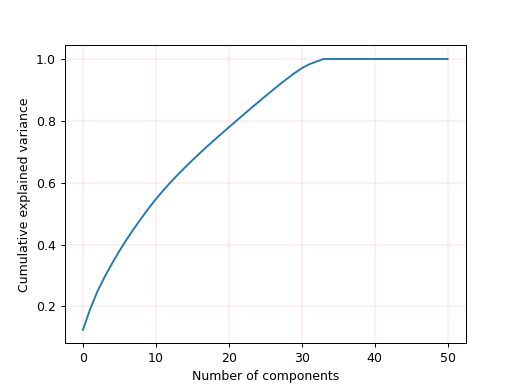

approx 90%:  0.8988888693709826
num of comp:  27


In [31]:
plt. figure(1)

plt.plot(cum_pca)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
plt.show()

idx = (np.abs(cum_pca  - .9)).argmin()
print('approx 90%: ', cum_pca[idx])
print('num of comp: ', idx + 1)

* First 28 components contain approx 90% of the variance

* PCA with 28 components

In [32]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
#n = 90
#pca = PCA(n/100)

## Fit the PCA on the training set
#pca.fit(X_features_std)

#print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

In [33]:
# PCA
pca = PCA(n_components = 28)

X_features_pca = pca.fit_transform(X_features_std)
X_features_pca.shape

(10000, 28)

In [34]:
pca_blind   = PCA().fit(X_blind_features_std .data)
X_blind_features_pca = pca.fit_transform(X_blind_features_std)
X_blind_features_pca.shape

(2000, 28)

In [35]:
#start = time.time()
#end = time.time()
#print('Train Time (seconds) of DT PCA:',end-start)

# ML

In [36]:
seed = 12345
np.random.seed(seed)

# DECISION TREE
### With and without PCA

* Searching for the depth of the tree that returns the best model accuracy

<IPython.core.display.Javascript object>


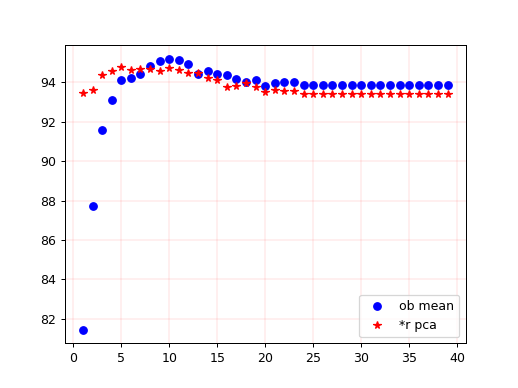

------------------------
depth:  2  mean:  81.43  mean_pca 93.44
depth:  3  mean:  87.74  mean_pca 93.62
depth:  4  mean:  91.56  mean_pca 94.39
depth:  5  mean:  93.1  mean_pca 94.57
depth:  6  mean:  94.14  mean_pca 94.78
depth:  7  mean:  94.21  mean_pca 94.62
depth:  8  mean:  94.43  mean_pca 94.68
depth:  9  mean:  94.82  mean_pca 94.69
depth:  10  mean:  95.09  mean_pca 94.6
depth:  11  mean:  95.19  mean_pca 94.73
depth:  12  mean:  95.12  mean_pca 94.63
depth:  13  mean:  94.95  mean_pca 94.49
depth:  14  mean:  94.41  mean_pca 94.49
depth:  15  mean:  94.59  mean_pca 94.24
depth:  16  mean:  94.44  mean_pca 94.14
depth:  17  mean:  94.4  mean_pca 93.76
depth:  18  mean:  94.17  mean_pca 93.8
depth:  19  mean:  94.02  mean_pca 93.97
depth:  20  mean:  94.14  mean_pca 93.76
depth:  21  mean:  93.84  mean_pca 93.53
depth:  22  mean:  93.97  mean_pca 93.6
depth:  23  mean:  94.04  mean_pca 93.57
depth:  24  mean:  94.01  mean_pca 93.54
depth:  25  mean:  93.88  mean_pca 93.4
depth

In [37]:
plt.figure(2)

vals     = []
vals_pca = []


print('------------------------')
for i in range(1,40):
    tree     = DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state=1)
    tree_pca = DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state=1)
    
    # Without PCA
    tree.fit(X_features, y_target)
    y_pred = tree.predict(X_features)
        
    # With PCA
    tree_pca.fit(X_features_pca, y_target)
    y_pred_pca = tree_pca.predict(X_features_pca)
    
    
    StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    
    
    score = cross_val_score(tree, X_features, y_target, cv = StratKfold)
    mean  = round(score.mean()*100,2)
    
    score_pca = cross_val_score(tree_pca, X_features_pca, y_target, cv = StratKfold)
    mean_pca  = round(score_pca.mean()*100,2)
    
    print('depth: ', i+1, ' mean: ', mean, ' mean_pca', mean_pca)
    
    
    plt.plot(i,mean, 'ob')
    plt.plot(i,mean_pca,'*r')
    
    
    vals.append(mean)
    vals_pca.append(mean_pca)

plt. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
plt.show()

plt.legend(['ob mean','*r pca'])

val, idx = max((val, idx) for (idx, val) in enumerate(vals))

val_pca, idx_pca = max((val_pca, idx_pca) for (idx_pca, val_pca) in enumerate(vals_pca))

print('###################')
print('Max depth without PCA: ', idx+1, 'Accuracy: ', val, '%')
print('Max depth with PCA: ', idx_pca+1, 'Accuracy: ', val_pca, '%')

* ROC

In [38]:
def QC_Metrics(model, Kfold, X_f, y_t, opt_pca,loss_type, axes1, axes2):

    
    if opt_pca==1:
        X_f=pd.DataFrame(X_f)

    tprs = [] # real
    aucs = [] # probability

    mean_fpr = np.linspace(0, 1, 100)

    train_scores = []
    test_scores  = []
    values = []
    
    loss_train = []
    loss_test  = []
    
    scores_array_train = []
    scores_array_test  = []
    
    ''' Comparing metrics
        -----------------
    '''
    
    for i, (train, test) in enumerate(Kfold.split(X_f, y_t)):
        #tree.fit(X_features[train], y_target[train])
        
        model.fit(X_f.iloc[train], y_t.iloc[train])
        
        # Evaluation on the training dataset
        train_yhat = model.predict(X_f.iloc[train])
        train_acc = accuracy_score(y_t.iloc[train], train_yhat)
        train_scores.append(train_acc)
        
    
        temp=precision_recall_fscore_support(y_t.iloc[train], train_yhat, average=None)
        scores_array_train.append(np.reshape(temp,-1))

        # evaluate on the test dataset
        test_yhat = model.predict(X_f.iloc[test])
        test_acc = accuracy_score(y_t.iloc[test], test_yhat)
        test_scores.append(test_acc)
        
        '''
        precision of class 0= avg_score[0][0]. 
        recall of class 0 = accessed by the second row 
        (i.e. for class 0, it is avg_score[1][0]), 
        while the fscore and support can be accessed from 3rd and 4th row respectively.
        '''
        temp=precision_recall_fscore_support(y_t.iloc[test], test_yhat, average=None)
        scores_array_test.append(np.reshape(temp,-1))
        
        # ROC
        
        viz = RocCurveDisplay.from_estimator(
            model,
            X_f.iloc[test],
            y_t.iloc[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=axes1,
        )
        
        
        norm_train = 0
        norm_test = 0
        
        a_1 = train_yhat
        b_1 = y_t.iloc[train].values
            
        a_2 = test_yhat
        b_2 = y_t.iloc[test].values
            
        if loss_type == 'L1':

            norm_train = np.linalg.norm( (a_1 - b_1), ord=1)
            norm_test  = np.linalg.norm( (a_2 - b_2), ord=1)
            
            loss_train.append(norm_train)
            loss_test.append(norm_test)
            
        elif loss_type=='L2':    
            norm_train = np.linalg.norm( (a_1 - b_1), ord=2)
            norm_test  = np.linalg.norm( (a_2 - b_2), ord=2)
            
            loss_train.append(norm_train)
            loss_test.append(norm_test)
        else :
            loss_train=[]
            loss_test =[]
                 

        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        values.append(i+1)
    
    # Converting independent scores to dataframe
    score_list = ['C0 avg','C1 avg','C0 recall','C1 recall','C0 f1','C1 f1','C0 Support','C1 Support']
    
    scores_array_train = pd.DataFrame(scores_array_train, columns=score_list)
    scores_array_train.index.name = 'K-Fold'
    
    scores_array_test = pd.DataFrame(scores_array_test, columns=score_list)
    scores_array_test.index.name = 'K-Fold'
    print('\n\n\n')
    print ('DATA EVALUATION SCORES')
    
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.colheader_justify', 'center')
    pd.set_option('display.precision', 3)

    display(scores_array_train)
        
    
    
    ################## 
    axes1.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    ploting_ROC(tprs, mean_fpr, aucs, opt_pca, axes1)
    
    plot_train_test_scores(values, train_scores, test_scores, loss_train, loss_test, axes2)
    
    
def ploting_ROC(tprs, mean_fpr, aucs, pca_opt, axes):
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    axes.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    axes.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    
    if (pca_opt==0):
        title_1="ROC without PCA"
    else:
        title_1="ROC with PCA"
            
    axes.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        
        title=title_1,
    )
    axes.legend(loc="lower right", bbox_to_anchor=(1, 0))

def plot_train_test_scores(values, train_scores, test_scores, loss_train, loss_test, axes):
    axes.plot(values, train_scores, '-o', label='Train')
    axes.plot(values, test_scores,  '-o', label='Test')
    
    #loss_user=['L1', 'L2']
    #if in list1:
    #    val='weekday'
    
    if loss_train:
        axes.plot(values, loss_train, '--o', label='Loss Train')
        axes.plot(values, loss_test,  '--o', label='Loss Test')
    
    #axes.set(ylim=[0, 1])
    axes.set_xlabel('Kfold')
    axes.set_ylabel('Accuracy')
    axes.legend(loc="lower right", bbox_to_anchor=(0.7, 0))
    

### MODEL TRAINING QC

* Defining the model with max depth and QC

<IPython.core.display.Javascript object>


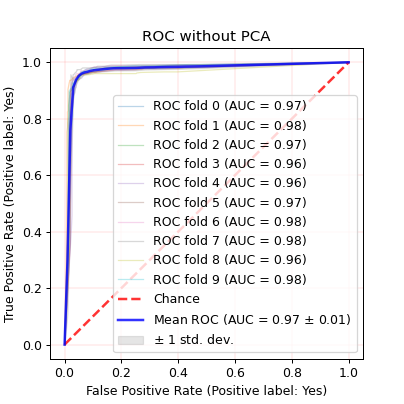

<IPython.core.display.Javascript object>


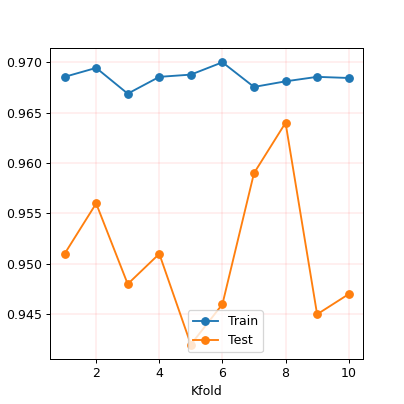

<IPython.core.display.Javascript object>


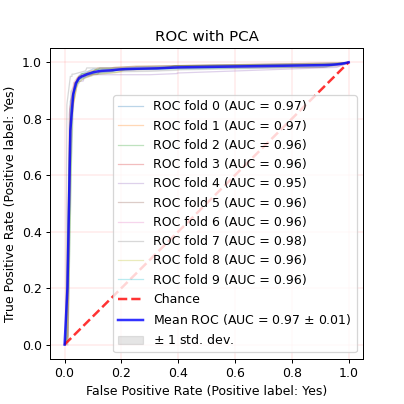

<IPython.core.display.Javascript object>


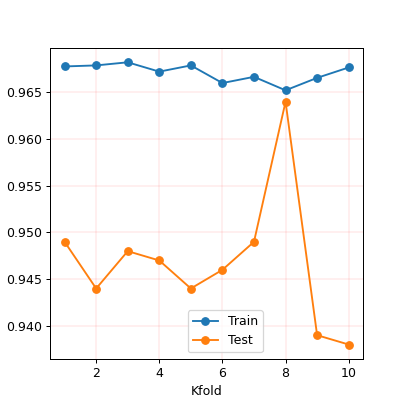





DATA EVALUATION SCORES


,C0 avg,C1 avg,C0 recall,C1 recall,C0 f1,C1 f1,C0 Support,C1 Support
K-Fold,,,,,,,,
0,0.970,0.967,0.967,0.970,0.969,0.969,4500.0,4500.0
1,0.972,0.967,0.967,0.972,0.969,0.970,4500.0,4500.0
2,0.966,0.968,0.968,0.966,0.967,0.967,4500.0,4500.0
3,0.968,0.969,0.970,0.968,0.969,0.969,4500.0,4500.0
4,0.968,0.969,0.969,0.968,0.969,0.969,4500.0,4500.0
5,0.968,0.972,0.972,0.968,0.970,0.970,4500.0,4500.0
6,0.969,0.967,0.966,0.969,0.968,0.968,4500.0,4500.0
7,0.969,0.967,0.967,0.969,0.968,0.968,4500.0,4500.0
8,0.972,0.965,0.965,0.972,0.968,0.969,4500.0,4500.0






DATA EVALUATION SCORES


,C0 avg,C1 avg,C0 recall,C1 recall,C0 f1,C1 f1,C0 Support,C1 Support
K-Fold,,,,,,,,
0,0.963,0.973,0.973,0.963,0.968,0.968,4500.0,4500.0
1,0.969,0.966,0.966,0.970,0.968,0.968,4500.0,4500.0
2,0.969,0.967,0.967,0.969,0.968,0.968,4500.0,4500.0
3,0.971,0.964,0.964,0.971,0.967,0.967,4500.0,4500.0
4,0.964,0.971,0.972,0.964,0.968,0.968,4500.0,4500.0
5,0.965,0.967,0.968,0.964,0.966,0.966,4500.0,4500.0
6,0.964,0.970,0.970,0.964,0.967,0.967,4500.0,4500.0
7,0.963,0.967,0.967,0.963,0.965,0.965,4500.0,4500.0
8,0.965,0.968,0.968,0.965,0.967,0.966,4500.0,4500.0


In [39]:
fig1=plt.figure(3,figsize=(5,5))
fig2=plt.figure(4,figsize=(5,5))
fig3=plt.figure(5,figsize=(5,5))
fig4=plt.figure(6,figsize=(5,5))

ax1=fig1.add_subplot(111)
ax2=fig2.add_subplot(111)
ax3=fig3.add_subplot(111)
ax4=fig4.add_subplot(111)

tree     = DecisionTreeClassifier(criterion='gini', max_depth = 9, random_state = 1)
tree_pca = DecisionTreeClassifier(criterion='gini', max_depth = 7, random_state = 1)

StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

loss_type='Missfit'
QC_Metrics(tree,     StratKfold, X_features,     y_target, 0, loss_type, ax1, ax2)
QC_Metrics(tree_pca, StratKfold, X_features_pca, y_target, 1, loss_type, ax3, ax4)

ax1. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
ax2. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
ax3. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
ax4. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)

plt.show()

* 3 most imortant features

In [40]:
# Finding the 3 most imortant features
importance  = tree.feature_importances_
column_names = X_features.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importances)):
    if ii <3:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])

print('The 3 most important featuires in decision tree model are: '+str(important_features))

The 3 most important featuires in decision tree model are: ['STATE_PA', 'HAS_GUARANTOR_NO', 'OWN_RESIDENCE_YES']


* More important

In [41]:
importances

{0.014738946915960813: 'EMI_TENURE',
 0.010680759731027317: 'TRANSACTION_AMOUNT',
 0.0: 'RFM_SCORE_2',
 0.013602035563589967: 'CREDIT_HISTORY_ALL CREDITS PAID BACK',
 0.023735735828032796: 'CREDIT_HISTORY_DELAY IN PAST',
 0.0034693703511362245: 'CREDIT_HISTORY_EXISTING CREDITS PAID BACK',
 0.0008703195419330578: 'TRANSACTION_CATEGORY_EDUCATION',
 0.0020929220749850144: 'TRANSACTION_CATEGORY_ELECTRONICS',
 0.00043144473130852964: 'TRANSACTION_CATEGORY_RETRAINING',
 0.0013104731628598555: 'TRANSACTION_CATEGORY_USED CAR',
 0.000442514654422225: 'ACCOUNT_TYPE_100 to 500 K USD',
 0.0010777430235200433: 'ACCOUNT_TYPE_UNKNOWN/NONE',
 0.0003280406221519399: 'ACCOUNT_TYPE_above 1000 K USD',
 0.0954793390711992: 'ACCOUNT_AGE_4 to 7 YRS',
 0.010369796665413121: 'ACCOUNT_AGE_above 7 YRS',
 0.0019062168016967394: 'ACCOUNT_AGE_up to 1 YR',
 0.00027073083398003017: 'STATE_CT',
 0.002310459406321618: 'STATE_NJ',
 0.00044044615002218504: 'STATE_NY',
 0.44408698734994717: 'STATE_PA',
 0.0204242703262710

### MODEL TESTING with the blind dataset

<IPython.core.display.Javascript object>


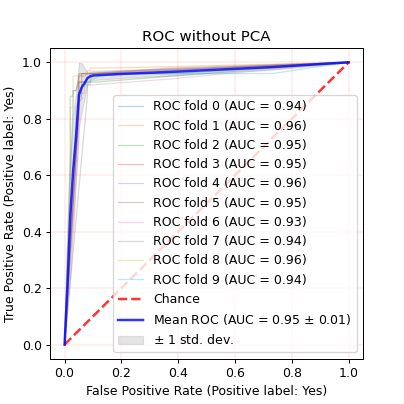

<IPython.core.display.Javascript object>


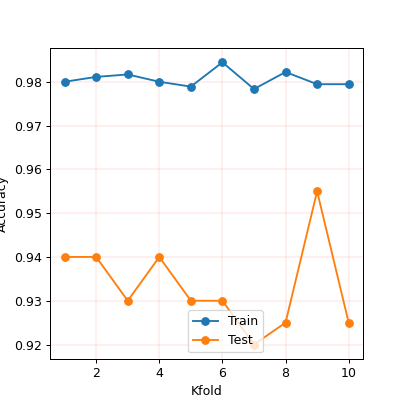

<IPython.core.display.Javascript object>


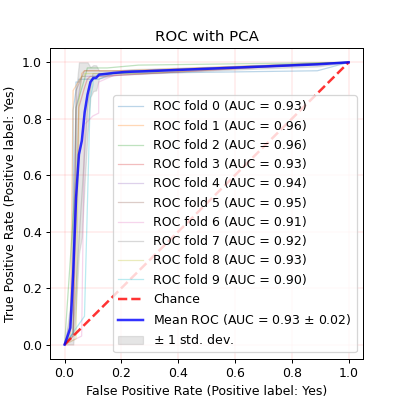

<IPython.core.display.Javascript object>


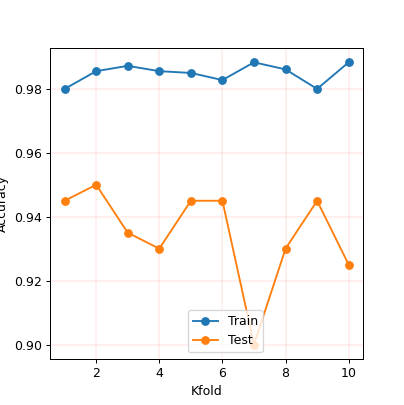





DATA EVALUATION SCORES


,C0 avg,C1 avg,C0 recall,C1 recall,C0 f1,C1 f1,C0 Support,C1 Support
K-Fold,,,,,,,,
0,0.974,0.986,0.987,0.973,0.980,0.980,900.0,900.0
1,0.984,0.978,0.978,0.984,0.981,0.981,900.0,900.0
2,0.978,0.985,0.986,0.978,0.982,0.982,900.0,900.0
3,0.975,0.985,0.986,0.974,0.980,0.980,900.0,900.0
4,0.975,0.983,0.983,0.974,0.979,0.979,900.0,900.0
5,0.988,0.981,0.981,0.988,0.984,0.984,900.0,900.0
6,0.974,0.983,0.983,0.973,0.978,0.978,900.0,900.0
7,0.982,0.982,0.982,0.982,0.982,0.982,900.0,900.0
8,0.982,0.977,0.977,0.982,0.979,0.980,900.0,900.0






DATA EVALUATION SCORES


,C0 avg,C1 avg,C0 recall,C1 recall,C0 f1,C1 f1,C0 Support,C1 Support
K-Fold,,,,,,,,
0,0.979,0.981,0.981,0.979,0.980,0.980,900.0,900.0
1,0.993,0.978,0.978,0.993,0.985,0.986,900.0,900.0
2,0.993,0.981,0.981,0.993,0.987,0.987,900.0,900.0
3,0.994,0.977,0.977,0.994,0.985,0.986,900.0,900.0
4,0.991,0.979,0.979,0.991,0.985,0.985,900.0,900.0
5,0.987,0.979,0.979,0.987,0.983,0.983,900.0,900.0
6,0.992,0.985,0.984,0.992,0.988,0.988,900.0,900.0
7,0.991,0.981,0.981,0.991,0.986,0.986,900.0,900.0
8,0.994,0.967,0.966,0.994,0.980,0.980,900.0,900.0


In [42]:
fig1=plt.figure(7,figsize=(5,5))
fig2=plt.figure(8,figsize=(5,5))
fig3=plt.figure(9,figsize=(5,5))
fig4=plt.figure(10,figsize=(5,5))

ax1=fig1.add_subplot(111)
ax2=fig2.add_subplot(111)
ax3=fig3.add_subplot(111)
ax4=fig4.add_subplot(111)

tree     = DecisionTreeClassifier(criterion='gini', max_depth = 9, random_state = 1)
tree_pca = DecisionTreeClassifier(criterion='gini', max_depth = 7, random_state = 1)

StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

loss_type='Missfit'

QC_Metrics(tree,     StratKfold,  X_blind_features,     y_blind_target, 0, loss_type, ax1, ax2)
QC_Metrics(tree_pca, StratKfold,  X_blind_features_pca, y_blind_target, 1, loss_type, ax3, ax4)


ax1. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
ax2. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
ax3. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
ax4. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)


In [43]:
#%reset_selective -f abc

In [44]:
#%reset_selective -f dataset_num